# Predictive Modeling - Project - Problem 2

You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

Dataset for Problem 2: Holiday_Package.csv

Data Dictionary:

Variable Name		Description
Holiday_Package		Opted for Holiday Package yes/no?
Salary 	 			Employee salary
age 	 			Age in years
edu 	 			Years of formal education
no_young_children	The number of young children (younger than 7 years)
no_older_children	Number of older children
foreign 	 		foreigner Yes/No


In [1]:
#Import all necessary modules
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import os 
cwd = os.getcwd()
print(cwd)

pd.options.display.max_columns = None
pd.options.display.width=None
pd.options.display.float_format = '{:,.7}'.format

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale

D:\Workspace\D-S-B-A\5-PredictiveModeling\Project


In [2]:
df=pd.read_csv('Holiday_Package.csv')
df = df.drop(['sl-no'], axis=1)

df.columns
df.shape
df.dtypes
df.info()
df.head()
df.describe().T

print('NA Counts ================>>>')
df.isna().sum().sum()
df.isna().sum()

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)
df.columns

Index(['Holiday_Package', 'Salary', 'age', 'education', 'no_young_children',
       'no_older_children', 'foreigner'],
      dtype='object')

(872, 7)

Holiday_Package      object
Salary                int64
age                   int64
education             int64
no_young_children     int64
no_older_children     int64
foreigner            object
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
Holiday_Package      872 non-null object
Salary               872 non-null int64
age                  872 non-null int64
education            872 non-null int64
no_young_children    872 non-null int64
no_older_children    872 non-null int64
foreigner            872 non-null object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


,Holiday_Package,Salary,age,education,no_young_children,no_older_children,foreigner
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


,count,mean,std,min,25%,50%,75%,max
Salary,872.0,"47,729.17","23,418.67","1,322.0","35,324.0","41,903.5","53,469.5","236,961.0"
age,872.0,39.95528,10.55167,20.0,32.0,39.0,48.0,62.0
education,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,0.3119266,0.61287,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,0.9827982,1.086786,0.0,0.0,1.0,2.0,6.0


NA Counts ================>>>


0

Holiday_Package      0
Salary               0
age                  0
education            0
no_young_children    0
no_older_children    0
foreigner            0
dtype: int64

Number of duplicate rows = 0


,Holiday_Package,Salary,age,education,no_young_children,no_older_children,foreigner


Before (872, 7)
After (872, 7)


Index(['Holiday_Package', 'Salary', 'age', 'education', 'no_young_children',
       'no_older_children', 'foreigner'],
      dtype='object')

## EDA

In [3]:
dff = df[['Salary', 'age', 'education', 'no_young_children','no_older_children']]

Q1 = dff.quantile(0.25)
Q3 = dff.quantile(0.75)
IQR = Q3 - Q1

dff.columns
df_items = pd.DataFrame()

df_items['RecCount'] = dff.count()
df_items['Min'] = dff.min()
df_items['Max'] = dff.max()
df_items['Range'] = dff.max() - dff.min()

df_items['Mean'] = dff.mean()
df_items['Median'] = dff.median()
df_items['Q1'] = dff.quantile(0.25)
df_items['Q2'] = dff.quantile(0.50)
df_items['Q3'] = dff.quantile(0.75)
df_items['IQR'] = dff.quantile(0.75) - dff.quantile(0.25)
df_items['Skew'] = dff.skew()
df_items['Kurtosis'] = dff.kurtosis()
df_items['StdDev'] = dff.std()
df_items['Variance'] = dff.var()
df_items['Left3Std'] = df_items['Mean'] - 3 * df_items['StdDev']
df_items['Right3Std'] = df_items['Mean'] + 3 * df_items['StdDev']

df_items['OutlierCount'] = ((dff < (Q1 - 1.5 * IQR)) | (dff > (Q3 + 1.5 * IQR))).sum()

df_items.round(2) 


Index(['Salary', 'age', 'education', 'no_young_children', 'no_older_children'], dtype='object')

,RecCount,Min,Max,Range,Mean,Median,Q1,Q2,Q3,IQR,Skew,Kurtosis,StdDev,Variance,Left3Std,Right3Std,OutlierCount
Salary,872,1322,236961,235639,"47,729.17","41,903.5","35,324.0","41,903.5","53,469.5","18,145.5",3.1,15.85,"23,418.67",5.48434e+08,"-22,526.83","117,985.2",57
age,872,20,62,42,39.96,39.0,32.0,39.0,48.0,16.0,0.15,-0.91,10.55,111.34,8.3,71.61,0
education,872,1,21,20,9.31,9.0,8.0,9.0,12.0,4.0,-0.05,0.01,3.04,9.22,0.2,18.42,4
no_young_children,872,0,3,3,0.31,0.0,0.0,0.0,0.0,0.0,1.95,3.11,0.61,0.38,-1.53,2.15,207
no_older_children,872,0,6,6,0.98,1.0,0.0,1.0,2.0,2.0,0.95,0.68,1.09,1.18,-2.28,4.24,2


In [4]:
df.info()
print(df.no_young_children.value_counts().sort_values())
print(df.no_older_children.value_counts().sort_values())
print(df.Holiday_Package.value_counts().sort_values())
print(df.foreigner.value_counts().sort_values())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 0 to 871
Data columns (total 7 columns):
Holiday_Package      872 non-null object
Salary               872 non-null int64
age                  872 non-null int64
education            872 non-null int64
no_young_children    872 non-null int64
no_older_children    872 non-null int64
foreigner            872 non-null object
dtypes: int64(5), object(2)
memory usage: 54.5+ KB
3      5
2     55
1    147
0    665
Name: no_young_children, dtype: int64
6      2
5      2
4     14
3     55
1    198
2    208
0    393
Name: no_older_children, dtype: int64
yes    401
no     471
Name: Holiday_Package, dtype: int64
yes    216
no     656
Name: foreigner, dtype: int64


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,872.0,"47,729.17","23,418.67","1,322.0","35,324.0","41,903.5","53,469.5","236,961.0"
age,872.0,39.95528,10.55167,20.0,32.0,39.0,48.0,62.0
education,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,0.3119266,0.61287,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,0.9827982,1.086786,0.0,0.0,1.0,2.0,6.0


### Check for Missing values

In [24]:
df.isnull().sum().sum()
df.isnull().sum()

0

Holiday_Package      0
Salary               0
age                  0
education            0
no_young_children    0
no_older_children    0
foreigner            0
dtype: int64

### Imputing missing values

In [7]:
#There are no missing values in the dataset. So there is nothing to impute. 
#for column in df.columns:
#    median = df[column].median()
#    df[column] = df[column].fillna(median)    
        
#df.isnull().sum()        

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

### Checking for Duplicates

In [25]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 0


### Proportion in the Target classes

In [136]:
df.Holiday_Package.value_counts()
df.Holiday_Package.value_counts(normalize=True)*100

0    471
1    401
Name: Holiday_Package, dtype: int64

0   54.01376
1   45.98624
Name: Holiday_Package, dtype: float64

### Outlier Checks

<Figure size 1440x288 with 0 Axes>

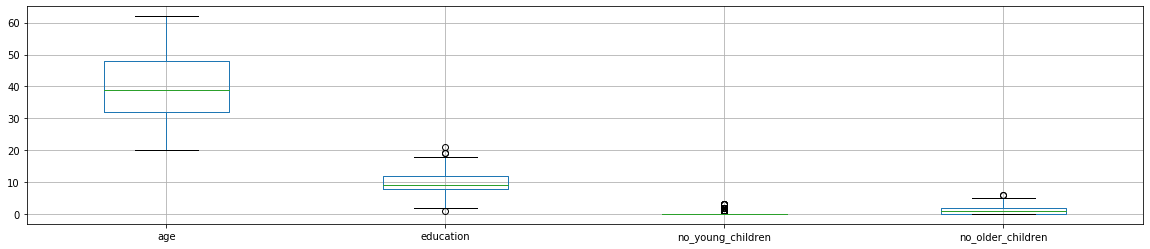

In [42]:
plt.figure(figsize=(20,4))
dff_selected = df[['age', 'education', 'no_young_children','no_older_children']]
#dff_selected = df[['Salary']]
#data=df_selected.apply(zscore)
dff_selected.boxplot(figsize=(6,4))

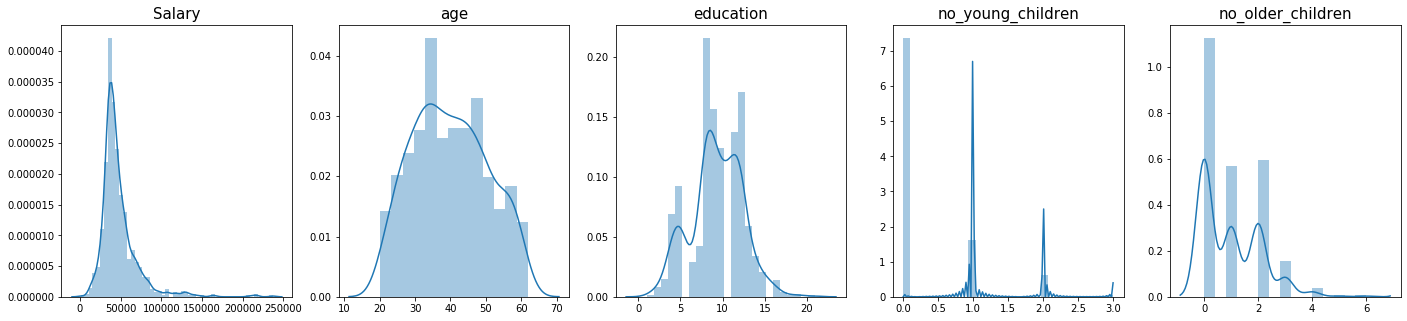

In [46]:
items = ['Salary', 'age', 'education', 'no_young_children','no_older_children']

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(24,5))
i = 0 
for item in items:
    axx=ax[i]
    null = sns.distplot(df[[item]], ax = axx, label=item, hist=True, rug=False).set_title(item, fontsize=15)
    i=i+1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


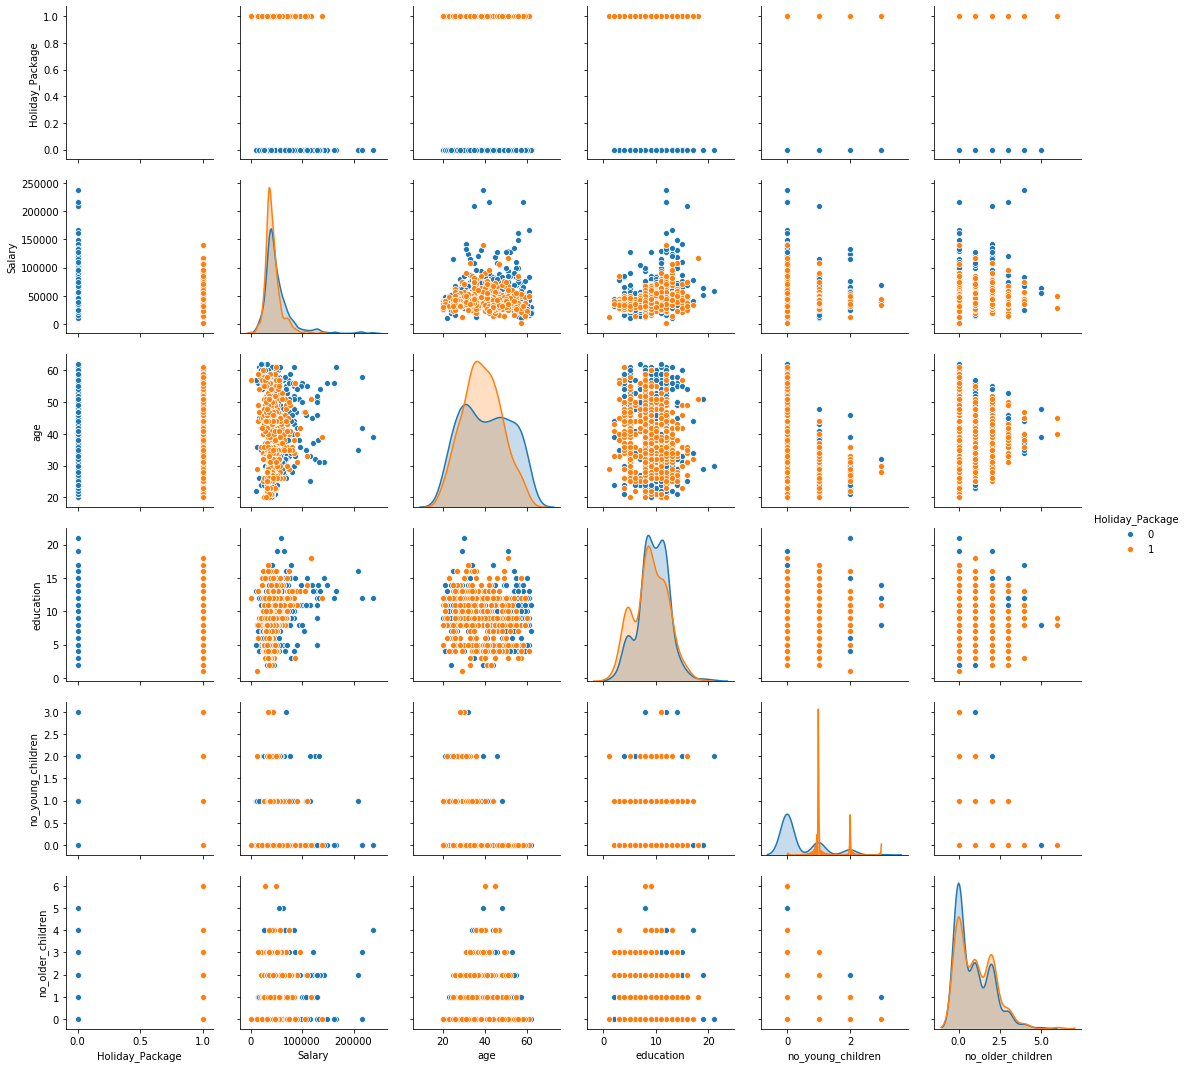

In [51]:
pp_df = df[['Holiday_Package', 'Salary', 'age', 'education', 'no_young_children','no_older_children']]

#sns.pairplot(pp_df , hue='Holiday_Package', diag_kind = 'kde')
pp_df['Holiday_Package'] = pp_df['Holiday_Package'].map({'yes': 1, 'no': 0})
sns.pairplot(pp_df , hue='Holiday_Package', diag_kind = 'kde')

In [52]:
df.info()
df_safe = df


<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 0 to 871
Data columns (total 7 columns):
Holiday_Package      872 non-null object
Salary               872 non-null int64
age                  872 non-null int64
education            872 non-null int64
no_young_children    872 non-null int64
no_older_children    872 non-null int64
foreigner            872 non-null object
dtypes: int64(5), object(2)
memory usage: 94.5+ KB


In [134]:
pp_df=pd.read_csv('Holiday_Package.csv')
pp_df = pp_df.drop(['sl-no'], axis=1)
pp_df = pp_df[['Holiday_Package', 'Salary', 'age', 'education', 'no_young_children','no_older_children']]
pp_df.corr().round(4)

def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = mydataframe.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)

mosthighlycorrelated(pp_df, 10).round(3)

,Salary,age,education,no_young_children,no_older_children
Salary,1.0,0.0717,0.3265,-0.0297,0.1138
age,0.0717,1.0,-0.1493,-0.5191,-0.1162
education,0.3265,-0.1493,1.0,0.0983,-0.0363
no_young_children,-0.0297,-0.5191,0.0983,1.0,-0.2384
no_older_children,0.1138,-0.1162,-0.0363,-0.2384,1.0


,FirstVariable,SecondVariable,Correlation
0,age,no_young_children,-0.519
1,Salary,education,0.327
2,no_young_children,no_older_children,-0.238
3,age,education,-0.149
4,age,no_older_children,-0.116
5,Salary,no_older_children,0.114
6,education,no_young_children,0.098
7,Salary,age,0.072
8,education,no_older_children,-0.036
9,Salary,no_young_children,-0.03


### Data split and preparation for Modeling


In [7]:
#categorical Data Encoding
df['Holiday_Package'] = df['Holiday_Package'].map({'yes': 1, 'no': 0})
df['foreigner'] = df['foreigner'].map({'yes': 1, 'no': 0})
df.head()

,Holiday_Package,Salary,age,education,no_young_children,no_older_children,foreigner
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


### Logistic Regression Model

In [8]:
from sklearn.model_selection import train_test_split
# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

x=df.drop(['Holiday_Package'], axis=1) 
y=df.Holiday_Package

x.head()
y.head()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)
x_train.shape
y_train.shape
x_test.shape
y_test.shape


,Salary,age,education,no_young_children,no_older_children,foreigner
0,48412,30,8,1,1,0
1,37207,45,8,0,1,0
2,58022,46,9,0,0,0
3,66503,31,11,2,0,0
4,66734,44,12,0,2,0


0    0
1    1
2    0
3    0
4    0
Name: Holiday_Package, dtype: int64

(610, 6)

(610,)

(262, 6)

(262,)

In [9]:
# Fit the model on original data i.e. before upsampling
# Fit the Logistic Regression model
model = LogisticRegression()
model.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
#Train and Test Data Predict
ytrain_predict = model.predict(x_train)
ytest_predict = model.predict(x_test)

In [11]:
# Accuracy - Training Data
model.score(x_train, y_train)

0.521311475409836

In [15]:
x_train.columns
model.coef_

Index(['Salary', 'age', 'education', 'no_young_children', 'no_older_children',
       'foreigner'],
      dtype='object')

array([[-9.78325745e-06,  5.66565917e-03,  3.01728438e-03,
        -1.12019224e-03,  1.63224052e-03,  1.35907234e-03]])

array([[0.49856664, 0.50143336],
       [0.54277095, 0.45722905],
       [0.74855356, 0.25144644],
       ...,
       [0.51294268, 0.48705732],
       [0.64815513, 0.35184487],
       [0.65996221, 0.34003779]])

AUC: 0.56784


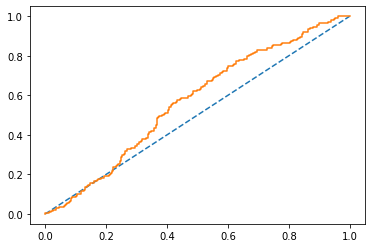

In [13]:
# predict probabilities
probs = model.predict_proba(x_train)
probs
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.5f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [16]:
# Accuracy - Test Data
model.score(x_test, y_test)

0.5381679389312977

AUC: 0.62700


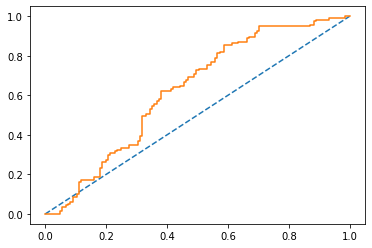

In [17]:
# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.5f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [18]:
## Given a confusion matrix as input, this function prints the accuracy, recall, specificity and precision
# This is the result given by Scikit learn confusion matrix. So we need to be careful as to what is TP, TN, Etc. 
#                                      Predicted
#          --------------------------------------------------------
#          |     True Negative (TN)   |    False Positive (FP)    |
# Actual   --------------------------------------------------------
#          |     False Negative (FN)  |    True Positive (TP)     |
#          --------------------------------------------------------
#F1 Score is needed when you want to seek a balance between Precision and Recall.

def get_cm_stats(cm):
    tp = cm[1][1]
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]

    accuracy = ( tp + tn) / (tp + tn + fp + fn)
    recall = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    f1_score = 2 * (precision * recall)/(precision + recall)
    
    print ('Accuracy: %.5f' % accuracy, '   ','Recall: %.5f' % recall, '   ', 'Specificity: %.5f' % specificity)
    print()
    print ( 'Precision: %.5f' % precision, '   ', 'F1 Score: %.5f' % f1_score)
    return

In [19]:
cmx = confusion_matrix(y_train, ytrain_predict)
cmx
print("---------------------------------------------------------------------------------")
print(classification_report(y_train, ytrain_predict))
print("---------------------------------------------------------------------------------")
get_cm_stats(cmx)


array([[294,  32],
       [260,  24]], dtype=int64)

---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.53      0.90      0.67       326
           1       0.43      0.08      0.14       284

    accuracy                           0.52       610
   macro avg       0.48      0.49      0.40       610
weighted avg       0.48      0.52      0.42       610

---------------------------------------------------------------------------------
Accuracy: 0.52131     Recall: 0.08451     Specificity: 0.90184

Precision: 0.42857     F1 Score: 0.14118


In [20]:
prisoner_cm_test=confusion_matrix(y_test, ytest_predict)
prisoner_cm_test
print("---------------------------------------------------------------------------------")
print(classification_report(y_test, ytest_predict))
print("---------------------------------------------------------------------------------")
get_cm_stats(prisoner_cm_test)

array([[129,  16],
       [105,  12]], dtype=int64)

---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.55      0.89      0.68       145
           1       0.43      0.10      0.17       117

    accuracy                           0.54       262
   macro avg       0.49      0.50      0.42       262
weighted avg       0.50      0.54      0.45       262

---------------------------------------------------------------------------------
Accuracy: 0.53817     Recall: 0.10256     Specificity: 0.88966

Precision: 0.42857     F1 Score: 0.16552


### LDA Model

In [21]:
# Copy all the predictor variables into X dataframe
X = df.drop('Holiday_Package', axis=1)
X = np.asmatrix(X)
#Scale X
#X = scale(X)

# Copy target into the y dataframe. 
y = np.asarray(df[['Holiday_Package']])

In [120]:
#df= df.drop(['Prediction'], axis=1)
df.head()

,Holiday_Package,Salary,age,education,no_young_children,no_older_children,foreigner
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


In [22]:
x=df.drop(['Holiday_Package'], axis=1) 
y=df.Holiday_Package

x.head()
y.head()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)
x_train.shape
y_train.shape
x_test.shape
y_test.shape

,Salary,age,education,no_young_children,no_older_children,foreigner
0,48412,30,8,1,1,0
1,37207,45,8,0,1,0
2,58022,46,9,0,0,0
3,66503,31,11,2,0,0
4,66734,44,12,0,2,0


0    0
1    1
2    0
3    0
4    0
Name: Holiday_Package, dtype: int64

(610, 6)

(610,)

(262, 6)

(262,)

In [23]:
#Build LDA Model
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
lda

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

### Prediction

In [24]:
#Train and Test Data Predict
ytrain_predict = lda.predict(x_train)
ytest_predict = lda.predict(x_test)

In [25]:
# Accuracy - Training Data
lda.score(x_train, y_train)

0.6721311475409836

In [36]:
x_train.columns
lda.coef_

Index(['Salary', 'age', 'education', 'no_young_children', 'no_older_children',
       'foreigner'],
      dtype='object')

array([[-1.47549548e-05, -5.43037831e-02,  7.59653739e-02,
        -1.42854644e+00, -4.63592980e-02,  1.62390347e+00]])

AUC: 0.56784


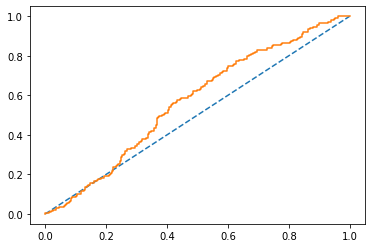

In [26]:
# predict probabilities
probs = model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.5f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [27]:
# Accuracy - Test Data
lda.score(x_test, y_test)

0.6412213740458015

AUC: 0.62700


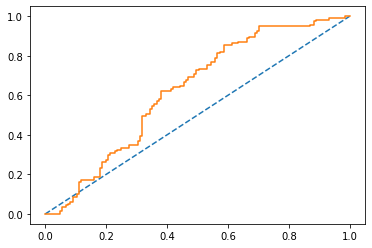

In [28]:
# predict probabilities
probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.5f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [29]:
cmx = confusion_matrix(y_train, ytrain_predict)
cmx
print("---------------------------------------------------------------------------------")
print(classification_report(y_train, ytrain_predict))
print("---------------------------------------------------------------------------------")
get_cm_stats(cmx)

array([[252,  74],
       [126, 158]], dtype=int64)

---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.68      0.56      0.61       284

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.67       610

---------------------------------------------------------------------------------
Accuracy: 0.67213     Recall: 0.55634     Specificity: 0.77301

Precision: 0.68103     F1 Score: 0.61240


In [30]:
prisoner_cm_test=confusion_matrix(y_test, ytest_predict)
prisoner_cm_test
print("---------------------------------------------------------------------------------")
print(classification_report(y_test, ytest_predict))
print("---------------------------------------------------------------------------------")
get_cm_stats(prisoner_cm_test)

array([[103,  42],
       [ 52,  65]], dtype=int64)

---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.66      0.71      0.69       145
           1       0.61      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262

---------------------------------------------------------------------------------
Accuracy: 0.64122     Recall: 0.55556     Specificity: 0.71034

Precision: 0.60748     F1 Score: 0.58036


In [31]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
Qclf = QuadraticDiscriminantAnalysis(reg_param=.001)
mod=Qclf.fit(x_train,y_train)
mod

mod.score(X,y)

#classification_report(y_train, pred_class)

print(classification_report(y_train, pred_class))



QuadraticDiscriminantAnalysis(priors=None, reg_param=0.001,
                              store_covariance=False, tol=0.0001)

0.6697247706422018

NameError: name 'pred_class' is not defined

# Conclusion

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

The model accuracy is 85%, which is the same value as the number of class 0 observations in the dataset. The higher precision and lower recall value supports this statement. i.e model is only able to correctly predict 25% of the class 1 cases . This confirms the model is affected by class imbalance problem.
Since, we have only 3333 observations, if re-build the same LDA model with more number of data, an even better model could be built.  
Alternatively, Logistic Regression and Random Forest can also be used on this dataset to build the predictive model and chose the model which gives a better performance result.

In [65]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [76]:
Qclf = QuadraticDiscriminantAnalysis(reg_param=.001)
model=Qclf.fit(X,y)
model

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.001,
                              store_covariance=False, tol=0.0001)

In [77]:
model.score(X,y)

0.8625862586258626

In [78]:
print(classification_report(y, pred_class))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      2850
           1       0.48      0.25      0.33       483

    accuracy                           0.85      3333
   macro avg       0.68      0.60      0.62      3333
weighted avg       0.82      0.85      0.83      3333



In [32]:
df.head()

,Holiday_Package,Salary,age,education,no_young_children,no_older_children,foreigner
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


In [35]:
# Fit the OLS model and get the params
#pp_df = pp_df[['Holiday_Package', 'Salary', 'age', 'education', 'no_young_children','no_older_children']]
import statsmodels.formula.api as smf
lm = smf.ols(formula= 'Holiday_Package ~ Salary+age+education+no_young_children+no_older_children', data = df).fit()
#lm = smf.ols(formula= 'price ~ length+cut+color+clarity+depth+table', data = df).fit()
lm.params
print(lm.summary())


Intercept                1.253172
Salary              -3.350243e-06
age                   -0.01165179
education             -0.00961365
no_young_children      -0.2449525
no_older_children    -0.002004436
dtype: float64

                            OLS Regression Results                            
Dep. Variable:        Holiday_Package   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     21.35
Date:                Sun, 17 May 2020   Prob (F-statistic):           3.51e-20
Time:                        18:23:44   Log-Likelihood:                -579.39
No. Observations:                 872   AIC:                             1171.
Df Residuals:                     866   BIC:                             1199.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.2532      0.10